# Digit Recognizer

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Data Preprocessing

In [4]:
# Sử dụng dataset của Kaggle
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print(train_df.shape)
print(test_df.shape) # tập dữ liệu kiểm tra, chưa có label

(42000, 785)
(28000, 784)


In [ ]:
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# split dataset in train.csv to x_train, x_test and y_train, y_test
from sklearn.model_selection import train_test_split

model_train_df = train_df.values[:10000]
y_train_full = model_train_df[:,0]
x_train_full = model_train_df[:,1:]
x_train, x_test, y_train, y_test = train_test_split(x_train_full, y_train_full, test_size=0.2)


In [ ]:
x_train.shape

(8000, 784)

In [ ]:
x_test.shape

(2000, 784)

In [ ]:
# Quan trọng: chuẩn hóa data mỗi pixel về [0,1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

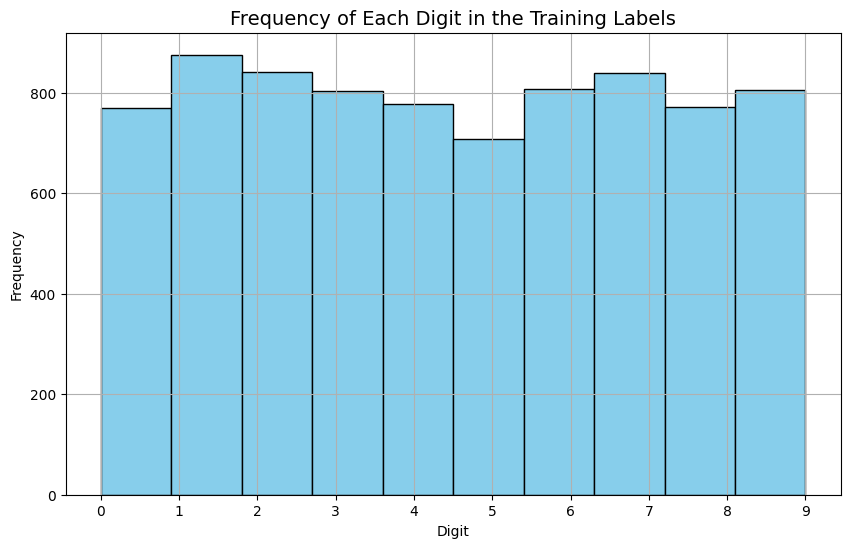

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(y_train, bins=10, edgecolor='black', color='skyblue')  # Sử dụng histogram để vẽ
plt.title('Frequency of Each Digit in the Training Labels', fontsize=14)
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(range(10))  # Đặt nhãn trục x là các số từ 0 đến 9
plt.show()

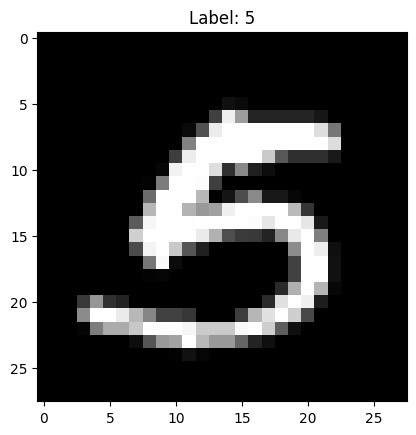

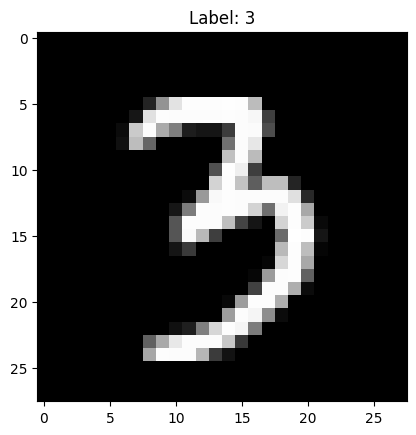

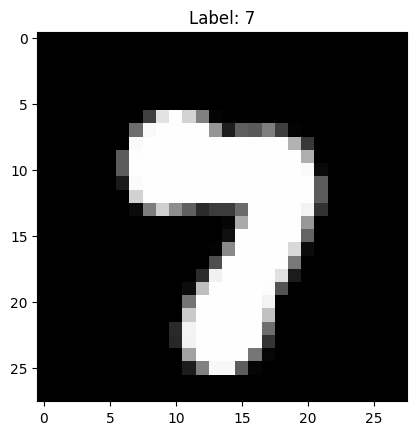

In [ ]:
# Hiển thị 3 hình ảnh bất kỳ từ tập train
for index in range(0,3):
  plt.imshow(x_train[index].reshape(28,28), cmap='gray') # Hiển thị ảnh dưới dạng thang độ xám
  plt.title(f"Label: {y_train[index]}")  # Hiển thị nhãn của ảnh
  plt.show()

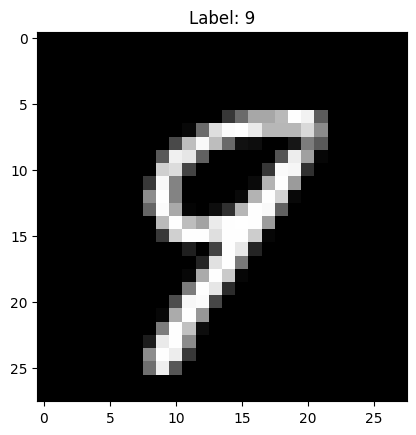

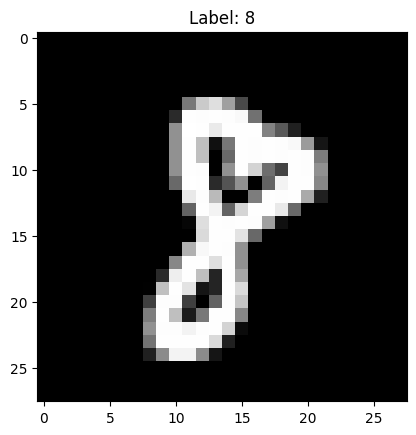

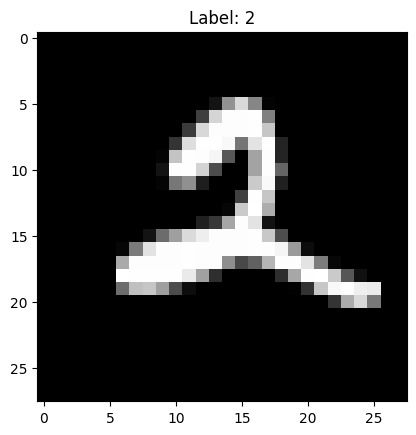

In [ ]:
# Hiển thị 3 hình ảnh bất kỳ từ tập test
for index in range(0,3):
  plt.imshow(x_test[index].reshape(28,28), cmap='gray') # Hiển thị ảnh dưới dạng thang độ xám
  plt.title(f"Label: {y_test[index]}")  # Hiển thị nhãn của ảnh
  plt.show()

## KNN

### Mathematical Theory:
- Tính khoảng cách từ điểm đầu vào tới tất cả các điểm trong tập train
- Tìm k điểm "hàng xóm" có distance nhỏ nhất => gần nhất
- Trong k hàng xóm đó, chọn nhãn xuất hiện nhiều nhất để quyết định nhãn cho điểm đầu vào. Tức là k hàng xóm gần nhất ở trong class nào nhiều thì sẽ cho điểm đầu vào vào class đó luôn

In [ ]:
def euclide_distance(point1, point2):
  return np.sqrt(np.sum((point1 - point2)**2))

# test hàm
p1 = np.array([1,2,3])
p2 = np.array([4,5,6])

print(euclide_distance(p1,p2))

5.196152422706632


In [ ]:
from collections import Counter

def knn(x_train, y_train, x, k):
  # tính các khoảng cách của điểm x so với từng điểm trong x_train
  distances = [euclide_distance(x, x_i) for x_i in x_train]
  k_indexes = np.argsort(distances)[:k] # lấy ra index của k hàng xóm gần nhất
  k_nearest_labels = [y_train[i] for i in k_indexes] # lấy ra nhãn của k hàng xóm gần nhất
  most_common = Counter(k_nearest_labels).most_common(1) # đếm nhãn xuất hiện nhiều nhất
  return most_common[0][0] # Counter trả về 1 tuple dạng (element, frequency) nên phải lấy [0][0]

In [ ]:
def predict(x_test, x_train, y_train, k):
    predictions = []

    for test_point in x_test:
        pred_label = knn(x_train, y_train, test_point, k)
        predictions.append(pred_label)

    predictions = np.array(predictions)
    return predictions

In [ ]:
def accuracy(predictions, y_test):
  accuracy = (predictions == y_test).sum() / y_test.shape[0]
  return accuracy

In [ ]:
predictions = predict(x_test, x_train, y_train, k = 5)
accuracy(predictions, y_test)

0.949

In [ ]:
test_df.shape

(28000, 784)

In [ ]:
# sử dụng model KNN để predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

y_train = train_df['label']
X_train = train_df.drop(columns=['label'])

X_test = test_df

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred_test = knn.predict(X_test)

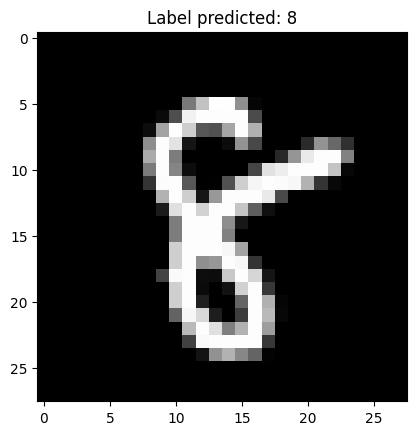

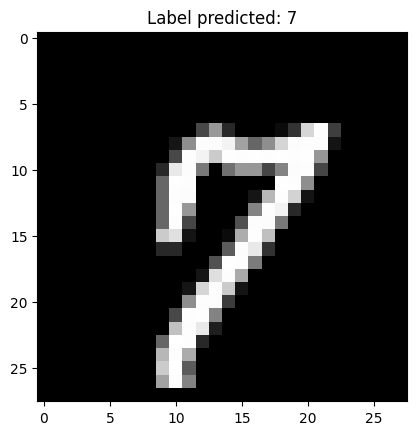

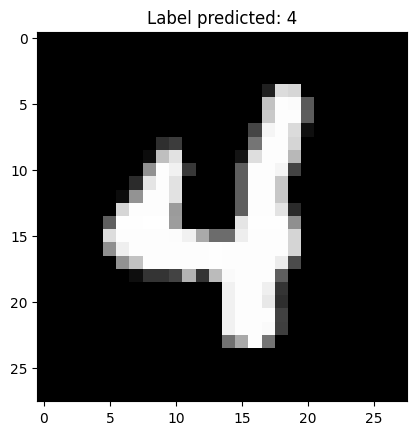

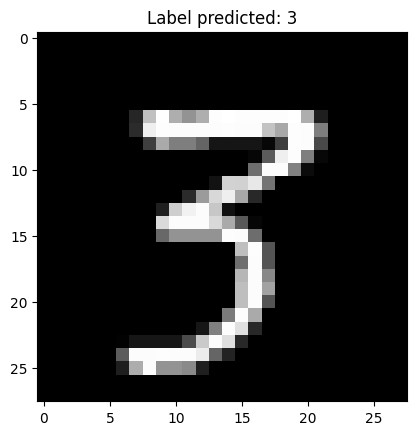

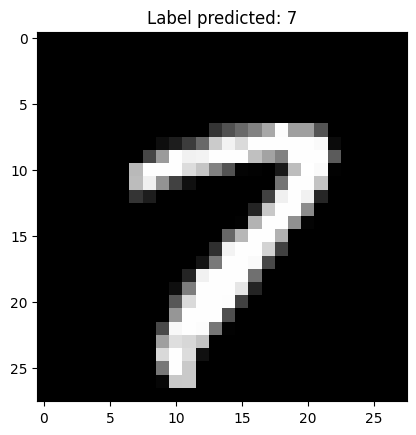

In [ ]:
# kiểm tra 5 mẫu test bất kỳ
import random

# Tạo danh sách 5 số nguyên ngẫu nhiên trong khoảng 0 đến 8400
random_numbers = [random.randint(0, test_df.shape[0]) for _ in range(5)]

for index in random_numbers:
  plt.imshow(test_df.values[index].reshape(28,28), cmap='gray') # Hiển thị ảnh dưới dạng thang độ xám
  plt.title(f"Label predicted: {knn(x_train, y_train, test_df.values[index], k = 5)}")  # Hiển thị nhãn của ảnh
  plt.show()

## SVM

### Mathematical Theory

- SVM - Support Vector Machine có mục tiêu là tìm ra 1 mặt ngăn cách (thường là 1 siêu phẳng) tốt nhất để phân chia 2 class
- Một siêu phẳng tốt sẽ phải cho ra margin lớn nhất (margin là khoảng cách của điểm gần nhất của 1 class tới mặt phân chia)
- Do đó, bản chất toán học ở đây là tìm w và b (weight và bias của siêu phẳng) để tối ưu khoảng cách từ điểm gần nhất của mỗi class tới siêu phẳng đó.



In [ ]:
# Trong bài toán này, đối với mỗi class (mỗi loại chữ số), SVM tìm 1 siêu phẳng để phân chia class đó với các class còn lại
# Mỗi siêu phẳng sẽ quyết định là 1 điểm input sẽ thuộc hay không thuộc từng loại chữ số
# Có 10 siêu phẳng ứng với 10 loại chữ số từ 0 - 9

In [ ]:
# chuyển cho data về 2 chiều để đưa vào SVC của SKLearn
x_train_2d = x_train.reshape(x_train.shape[0], -1)
x_test_2d = x_test.reshape(x_test.shape[0], -1)

In [ ]:
# Sử dụng SVM của thư viện SK Learn
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(x_train_2d, y_train)

y_pred = model.predict(x_test_2d)

In [ ]:
# Đánh giá accuracy
from sklearn import metrics

print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

accuracy: 0.919 



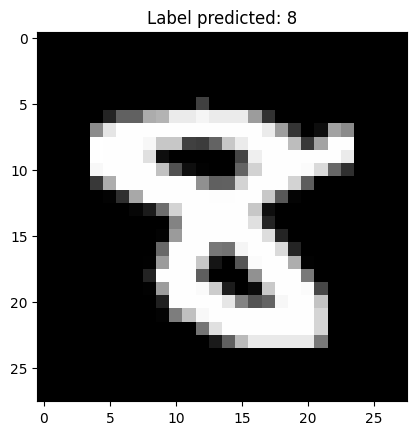

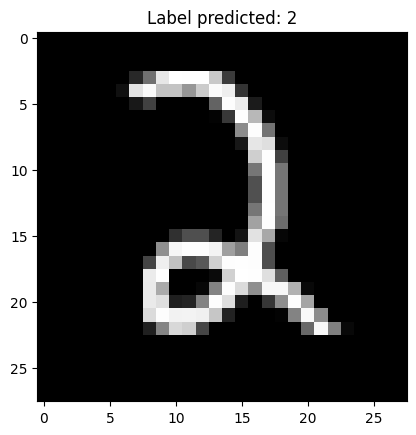

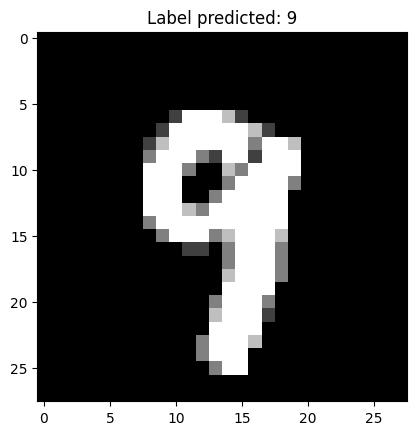

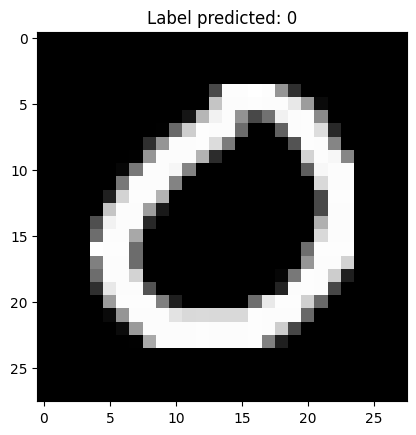

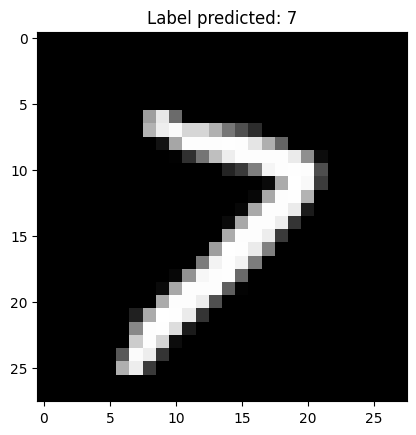

In [ ]:
import random

# Tạo danh sách 5 số nguyên ngẫu nhiên trong khoảng 0 đến số lượng mẫu trong test_df
random_numbers = [random.randint(0, test_df.values.shape[0] - 1) for _ in range(5)]

# Hiển thị và dự đoán nhãn cho 5 mẫu ngẫu nhiên
for index in random_numbers:
    # Hiển thị ảnh với kích thước 28x28
    plt.imshow(test_df.values[index].reshape(28, 28), cmap='gray')
    # Dự đoán nhãn
    prediction = model.predict(test_df.values[index].reshape(1, -1))
    plt.title(f"Label predicted: {prediction[0]}")
    plt.show()
